In [30]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataUtils as du
import os

# Create data for each tracked test person (RENORM s=20)

In [31]:
path_base = "../Data/person_data/"
hz = 30
#person_num = 9
start_offset_vals = [62,55,62,53,60,57,52,63,45,59]#work for renorm #[38,55,58,58,48,64,72,63,62,62] #

#get valid frames (frames without wobeling/ocscilation)
#start_offset = start_offset_vals[person_num] #(frame before action)
tracking_rate = 0.8 #seconds between each image
wanted_frames = 380 #amount of frames to extract
frame_offset = tracking_rate*hz #time between moves
spacing = 1 #how many previous frames that have to be still
t_eps = 1000 #translational error
r_eps =1000 #rotational error

#a = 100 #acceleration in steps
#samples = 3 #steps in gridsearch
#stepsize = 20
cols = ["X_trans", "Y_trans", "Z_trans", "X_rot", "Y_rot", "Z_rot"]

In [32]:

#load all data
tp_datas = []
tp_df_datas = []
for i in range(10):
  df = du.load_testperson2(i,path_base)
  # Change rotations to accurate coordinate system and make translations relative to frame 0
  df = du.fixCoordinates(df)
  df_valid, valid_idx = du.getValidFrames(df,wanted_frames,frame_offset,start_offset_vals[i],spacing,t_eps,r_eps)
  np_valid = df_valid[cols].iloc[:,:].values

  np_df = df[cols].iloc[start_offset_vals[i]:int(wanted_frames*frame_offset) + start_offset_vals[i],:].values
  tp_df_datas.append(np_df)
  tp_datas.append(np_valid)

tp_data = np.array(tp_datas)
tp_df_data = np.array(tp_df_datas)


#LOAD ACTUAL PERSON DATA
path = "../Data/"
f9 = np.load(path+"f9.npz")["arr_0"]
f10 = np.load(path+"f10.npz")["arr_0"]
m9 = np.load(path+"m9.npz")["arr_0"]
m10 = np.load(path+"m10.npz")["arr_0"]

temp1 = np.concatenate((f9,f10),axis=0)
temp2 = np.concatenate((m9,m10),axis = 0)
data = np.concatenate((temp1,temp2),axis=0)

#plot the initial frames shuch that the correct start offset can be found
#plt.figure()
#plt.title("Select start offset frame")
#plt.plot(df["X_trans"][25:100])
#plt.plot(df["Y_trans"][25:100])
#plt.plot(df["Z_trans"][25:100])
#plt.show()



#see min/max values
#print(df_valid.max())
#print(df_valid.min())
#print(df_valid.max()- df_valid.min())

print(tp_data.shape,data.shape)
      
#see tp min/max values
print("### OUR ###")
print(np.amin(tp_data,axis=(0,1)))
print(np.amax(tp_data,axis=(0,1)))
print("### THEIR ###")
print(np.amin(data,axis=(0,1)))
print(np.amax(data,axis=(0,1)))

print("### FULL ###")
print(tp_df_data.shape)

TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
(10, 380, 6) (10, 380, 6)
### OUR ###
[-1.0177   -2.897156 -0.969147 -4.115005 -0.288174 -0.78491 ]
[0.212829 1.085999 4.268097 2.465554 1.03617  1.044921]
### THEIR ###
[-0.330214 -2.465026 -0.941532 -5.533569 -0.631801 -0.47057 ]
[0.167386 0.751653 3.856536 2.680239 0.55193  0.815376]
### FULL ###
(10, 9120, 6)


# Save data

In [33]:
base_destination = r"Data/tsgBench/renorm"
cwd = os.path.dirname(os.getcwd())
path_destination= os.path.join(cwd,base_destination)
print(path_destination)

np.save(path_destination + r"/10renorm",tp_data)
np.save(path_destination + r"/10renorm_full",tp_df_data)
np.save(path_destination + r"/10abcd",data)

#np.savez(path_destination + r"/10renorm",tp_data)
#np.savez(path_destination + r"/10abcd",data)

c:\Users\DGaard\Desktop\Gits\Master_MRI_Phantom\Tracking\Data/tsgBench/renorm


(10, 380, 6) (10, 380, 6)


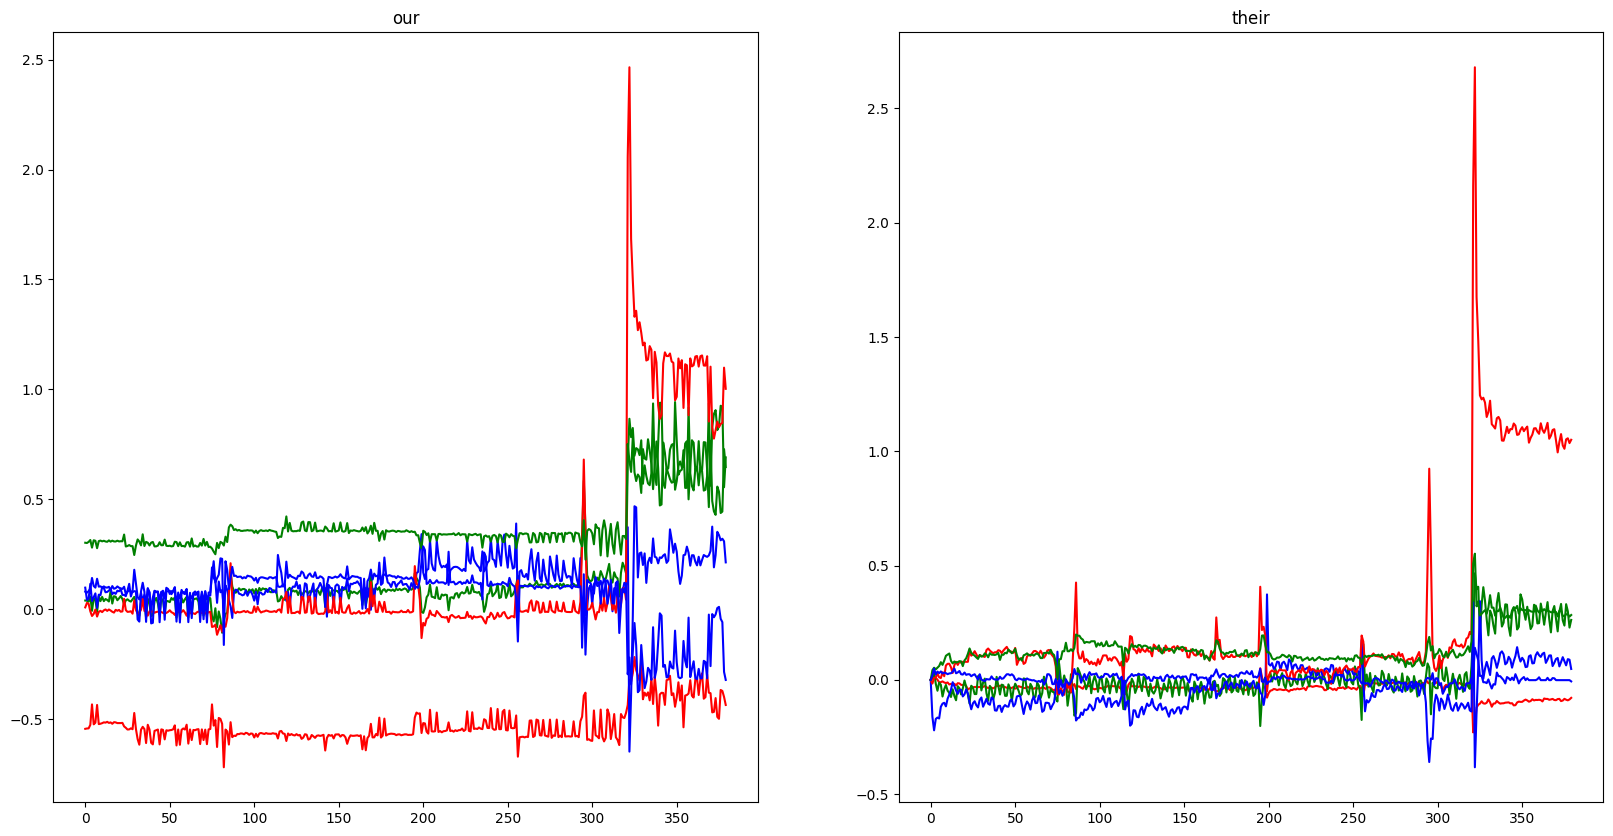

In [34]:
#control
temp1 = np.load(path_destination + r"/10renorm.npy")
temp2 =np.load(path_destination + r"/10abcd.npy")

print(temp1.shape,temp2.shape)

plt.figure(figsize=(20,10))
tp = 0
colors = ["red","green","blue","red","green","blue"]
for i in range(6):
  plt.subplot(1,2,1)
  plt.title("our")
  plt.plot(temp1[tp,:,i],c = colors[i])
  plt.subplot(1,2,2)
  plt.title("their")
  plt.plot(temp2[tp,:,i],c = colors[i])
plt.show()

# load step5 tp 2 and 7

In [37]:
tp5_datas = []
tp5_df_datas = []
path_base_5 = "../Data/"
start_offset_vals_5 = [50,57]
for i,obj in enumerate([2,7]):
  df = du.load_testperson3(obj,path_base_5)
  # Change rotations to accurate coordinate system and make translations relative to frame 0
  df = du.fixCoordinates(df)
  df_valid, valid_idx = du.getValidFrames(df,wanted_frames,frame_offset,start_offset_vals_5[i],spacing,t_eps,r_eps)
  np_valid = df_valid[cols].iloc[:,:].values
  np_df = df[cols].iloc[start_offset_vals[i]:int(wanted_frames*frame_offset) + start_offset_vals[i],:].values
  tp5_datas.append(np_valid)
  tp5_df_datas.append(np_df)
  
  
  #plt.figure()
  #plt.title("Select start offset frame")
  #plt.plot(df["X_trans"][25:150])
  #plt.plot(df["Y_trans"][25:150])
  #plt.plot(df["Z_trans"][25:150])
  #plt.show()

tp5_data = np.array(tp5_datas)
tp5_df_data = np.array(tp5_df_datas)

print(tp5_data.shape,tp5_df_data.shape)

TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
(2, 380, 6) (2, 9120, 6)


In [36]:
np.save(path_destination + r"/5_27",tp5_data)
np.save(path_destination + r"/5_27_full",tp5_df_data)